# Exploratory Data Analysis

## Import packages

In [2]:
#Data analysis and wrangling
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

The datatype of date_activ, date_end, date_modif_prod, and date_renewal is object, so we need to convert them to datetime.

In [7]:
date = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for i in date:
    client_df[i] = pd.to_datetime(client_df[i])

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
#change price_date datatype from object to datetime
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [12]:
#see the shape of the dataset
price_df.shape

(193002, 8)

In [13]:
client_df.shape

(14606, 26)

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [14]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [15]:
price_df.describe()

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2015-06-16 12:50:49.933161216,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2015-07-01 00:00:00,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592


### Missing Data

In [16]:
#Check how much of our data is missing
pd.DataFrame({"Missing value (%)": client_df.isnull().sum()/len(client_df.index)*100})

,Missing value (%)
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


In [17]:
#Check how much of our data is missing (price_df)
pd.DataFrame({"Missing value (%)": price_df.isnull().sum()/len(price_df.index)*100})

,Missing value (%)
id,0.0
price_date,0.0
price_off_peak_var,0.0
price_peak_var,0.0
price_mid_peak_var,0.0
price_off_peak_fix,0.0
price_peak_fix,0.0
price_mid_peak_fix,0.0


Good, no missing values in the dataset.

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [18]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

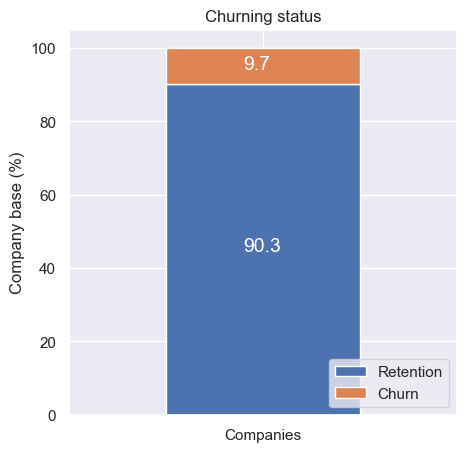

In [19]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

In [20]:
churn_percentage

,Companies
churn,
0,90.284814
1,9.715186


About 10% of total customers have churned, it is imbalanced dataset, so in the modeling process, we need to handle this problem.

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

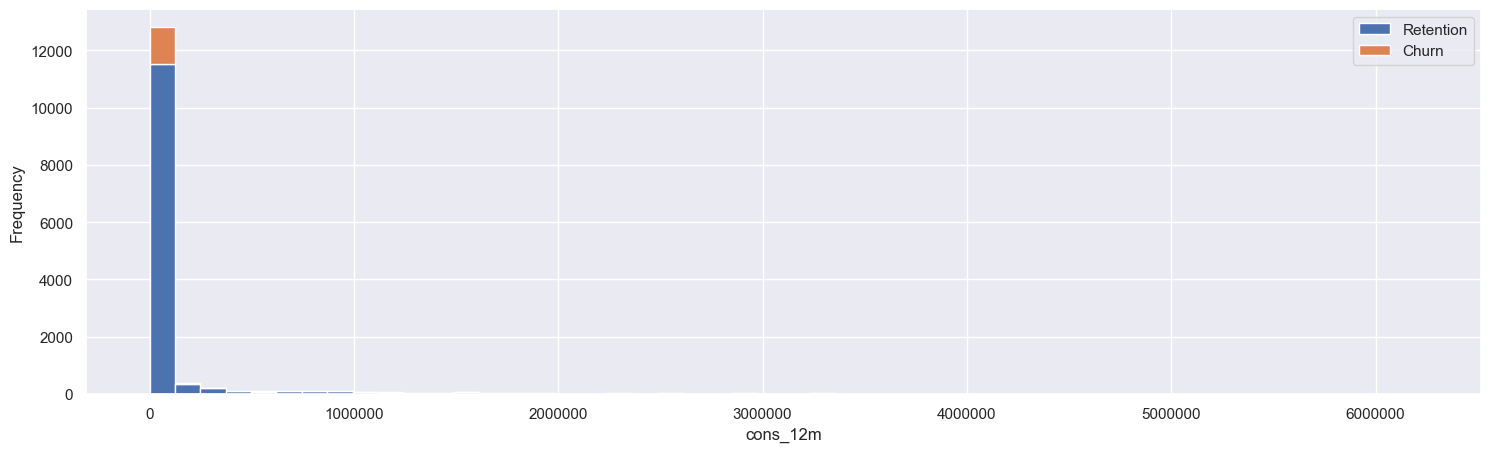

In [21]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

**Sale Channels**

Sale channels can play an important role in customer's rentation or churn. Some strong sale channels can create quality and loyal customers.

In [22]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [23]:
channel

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


In [24]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


Text(0, 0.5, 'Company base(%)')

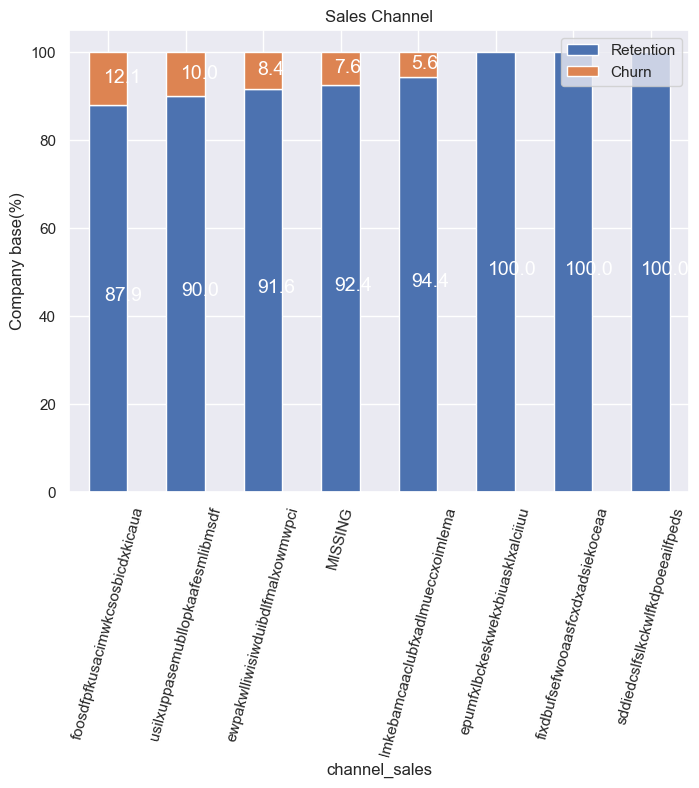

In [25]:
ax=channel_churn.plot(kind='bar', stacked=True, figsize=(8,6), rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Sales Channel')
plt.legend(['Retention', 'Churn'], loc='upper right')
plt.ylabel('Company base(%)')

There are 5 sales channels having churn rate

**Consumption**

Now we will see the consumption of customers during the last month and the last 12 months against the churn.
Because this is a numeric-categorical comparison, therefore we can use histogram distribution or box plot visualization.

In [26]:
consumption = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']]
consumption

,cons_12m,cons_gas_12m,cons_last_month,imp_cons
0,0,54946,0,0.00
1,4660,0,0,0.00
2,544,0,0,0.00
3,1584,0,0,0.00
4,4425,0,526,52.32
...,...,...,...,...
14601,32270,47940,0,0.00
14602,7223,0,181,15.94
14603,1844,0,179,18.05
14604,131,0,0,0.00


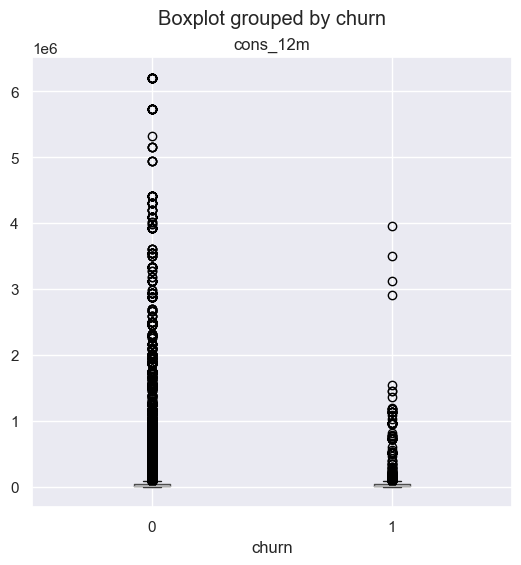

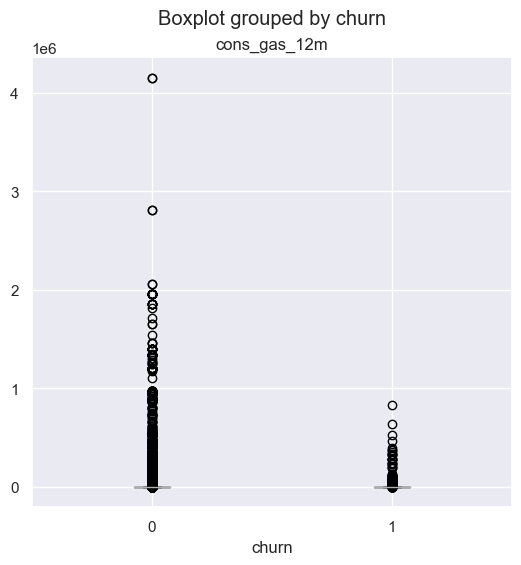

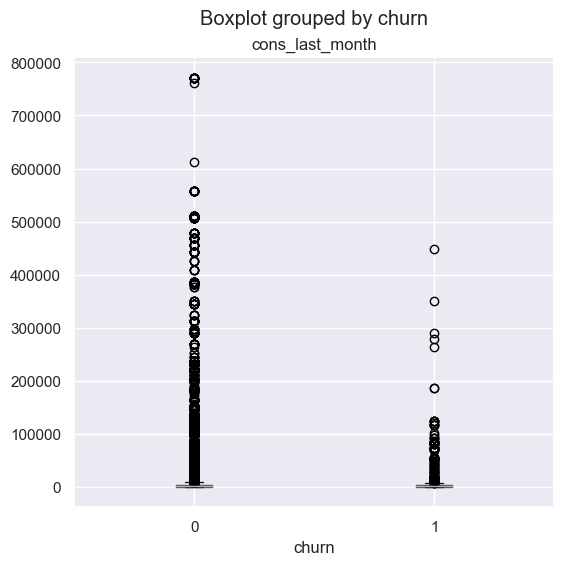

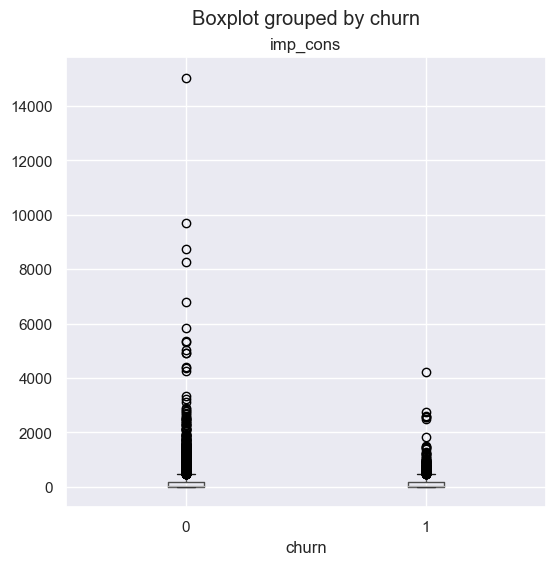

In [27]:
for col in consumption:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

We will create a plot_distribution to see the spread and skewness of the data

In [28]:
consumption = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

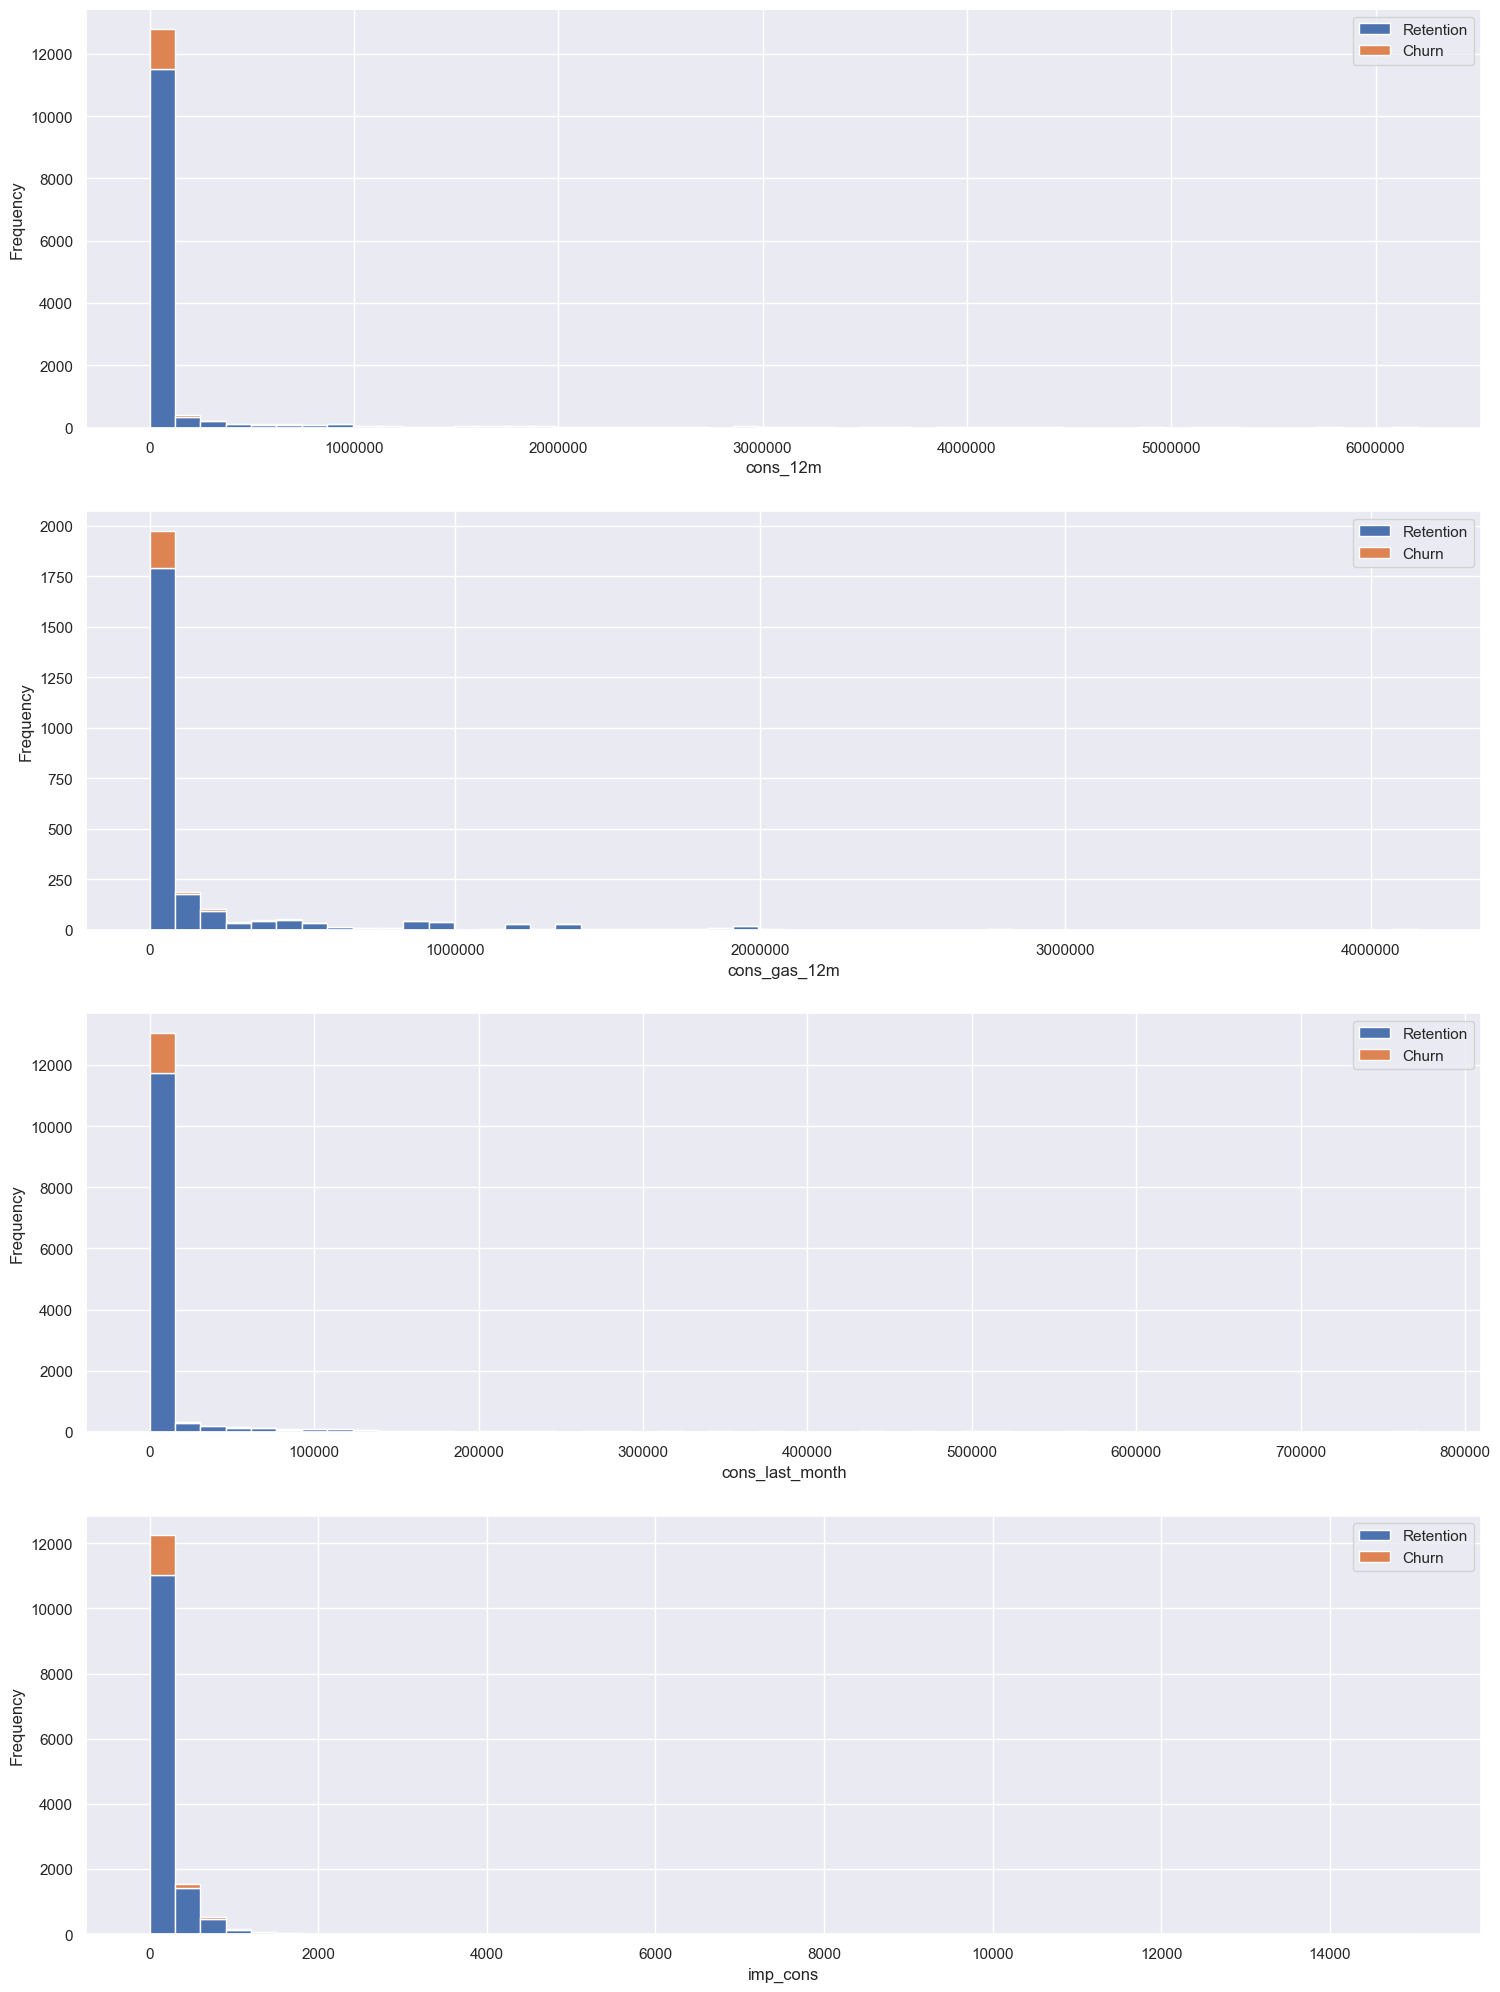

In [29]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas']=='t'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

There are a lot of outliers at the upper in the dataset and it is highly positive skewed. We'll address skewness and outliers in the feature engineering.

**Forecast**

In [30]:
forecast = client_df[['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m',
                      'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak']]
forecast

,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701
1,189.95,0,0.0,16.27,0.145711,0.000000,44.311378
2,47.96,0,0.0,38.72,0.165794,0.087899,44.311378
3,240.04,0,0.0,19.83,0.146694,0.000000,44.311378
4,445.75,526,0.0,131.73,0.116900,0.100015,40.606701
...,...,...,...,...,...,...,...
14601,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378
14602,631.69,181,0.0,144.03,0.100167,0.091892,58.995952
14603,190.39,179,0.0,129.60,0.116900,0.100015,40.606701
14604,19.34,0,0.0,7.18,0.145711,0.000000,44.311378


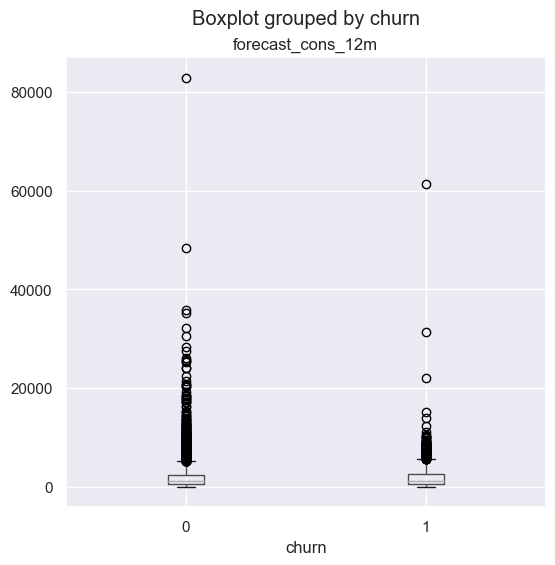

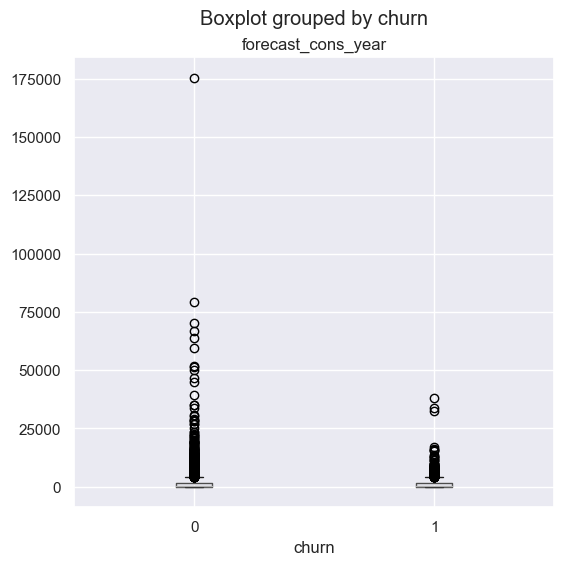

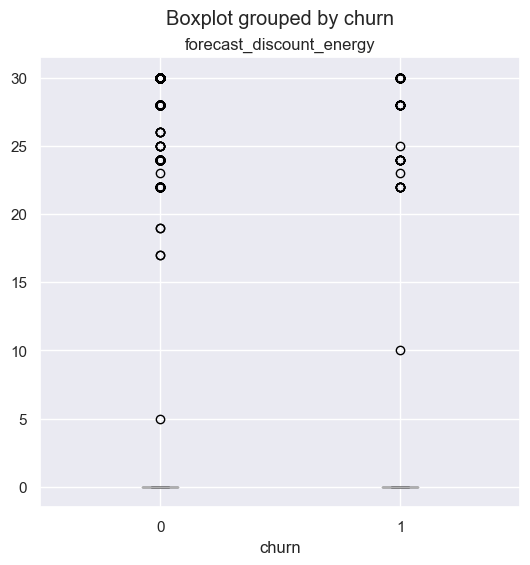

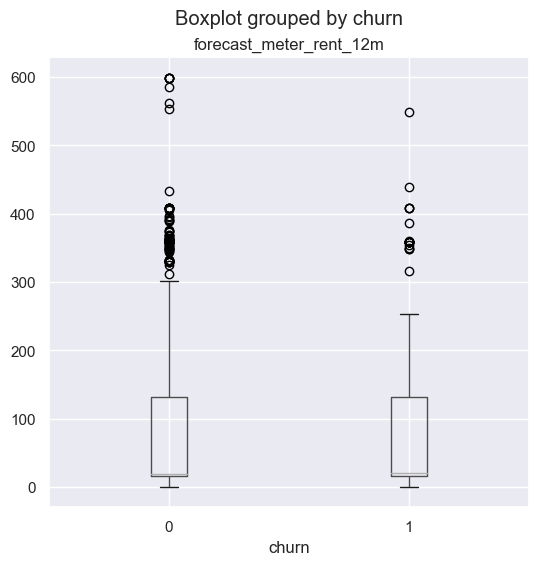

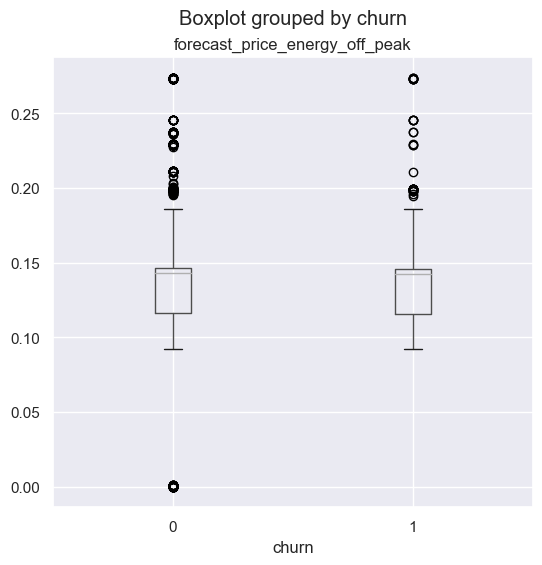

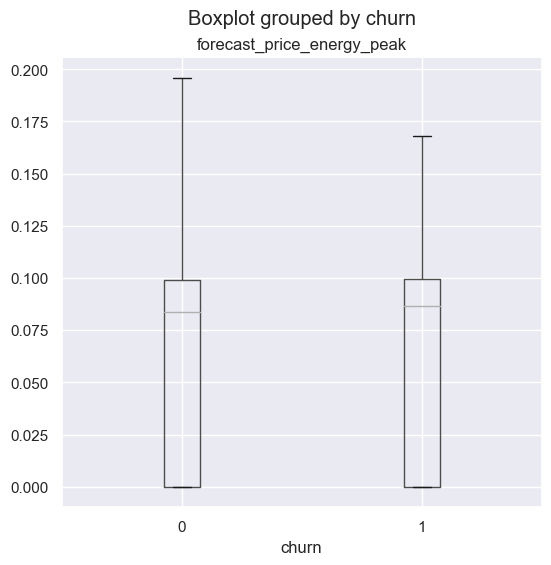

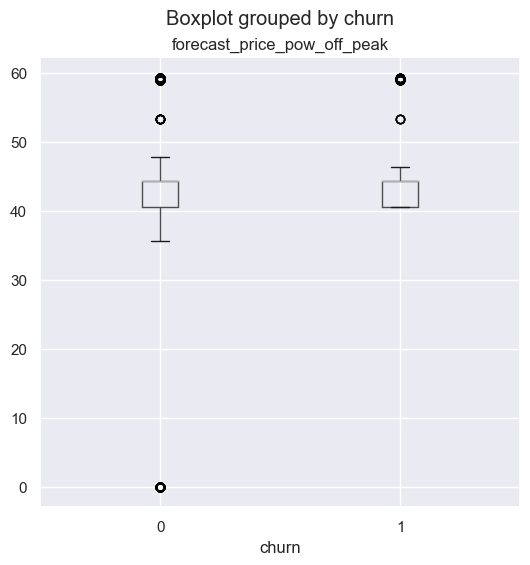

In [31]:
for col in forecast:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

Similar to consumption, forecast variables also show positive skewed.

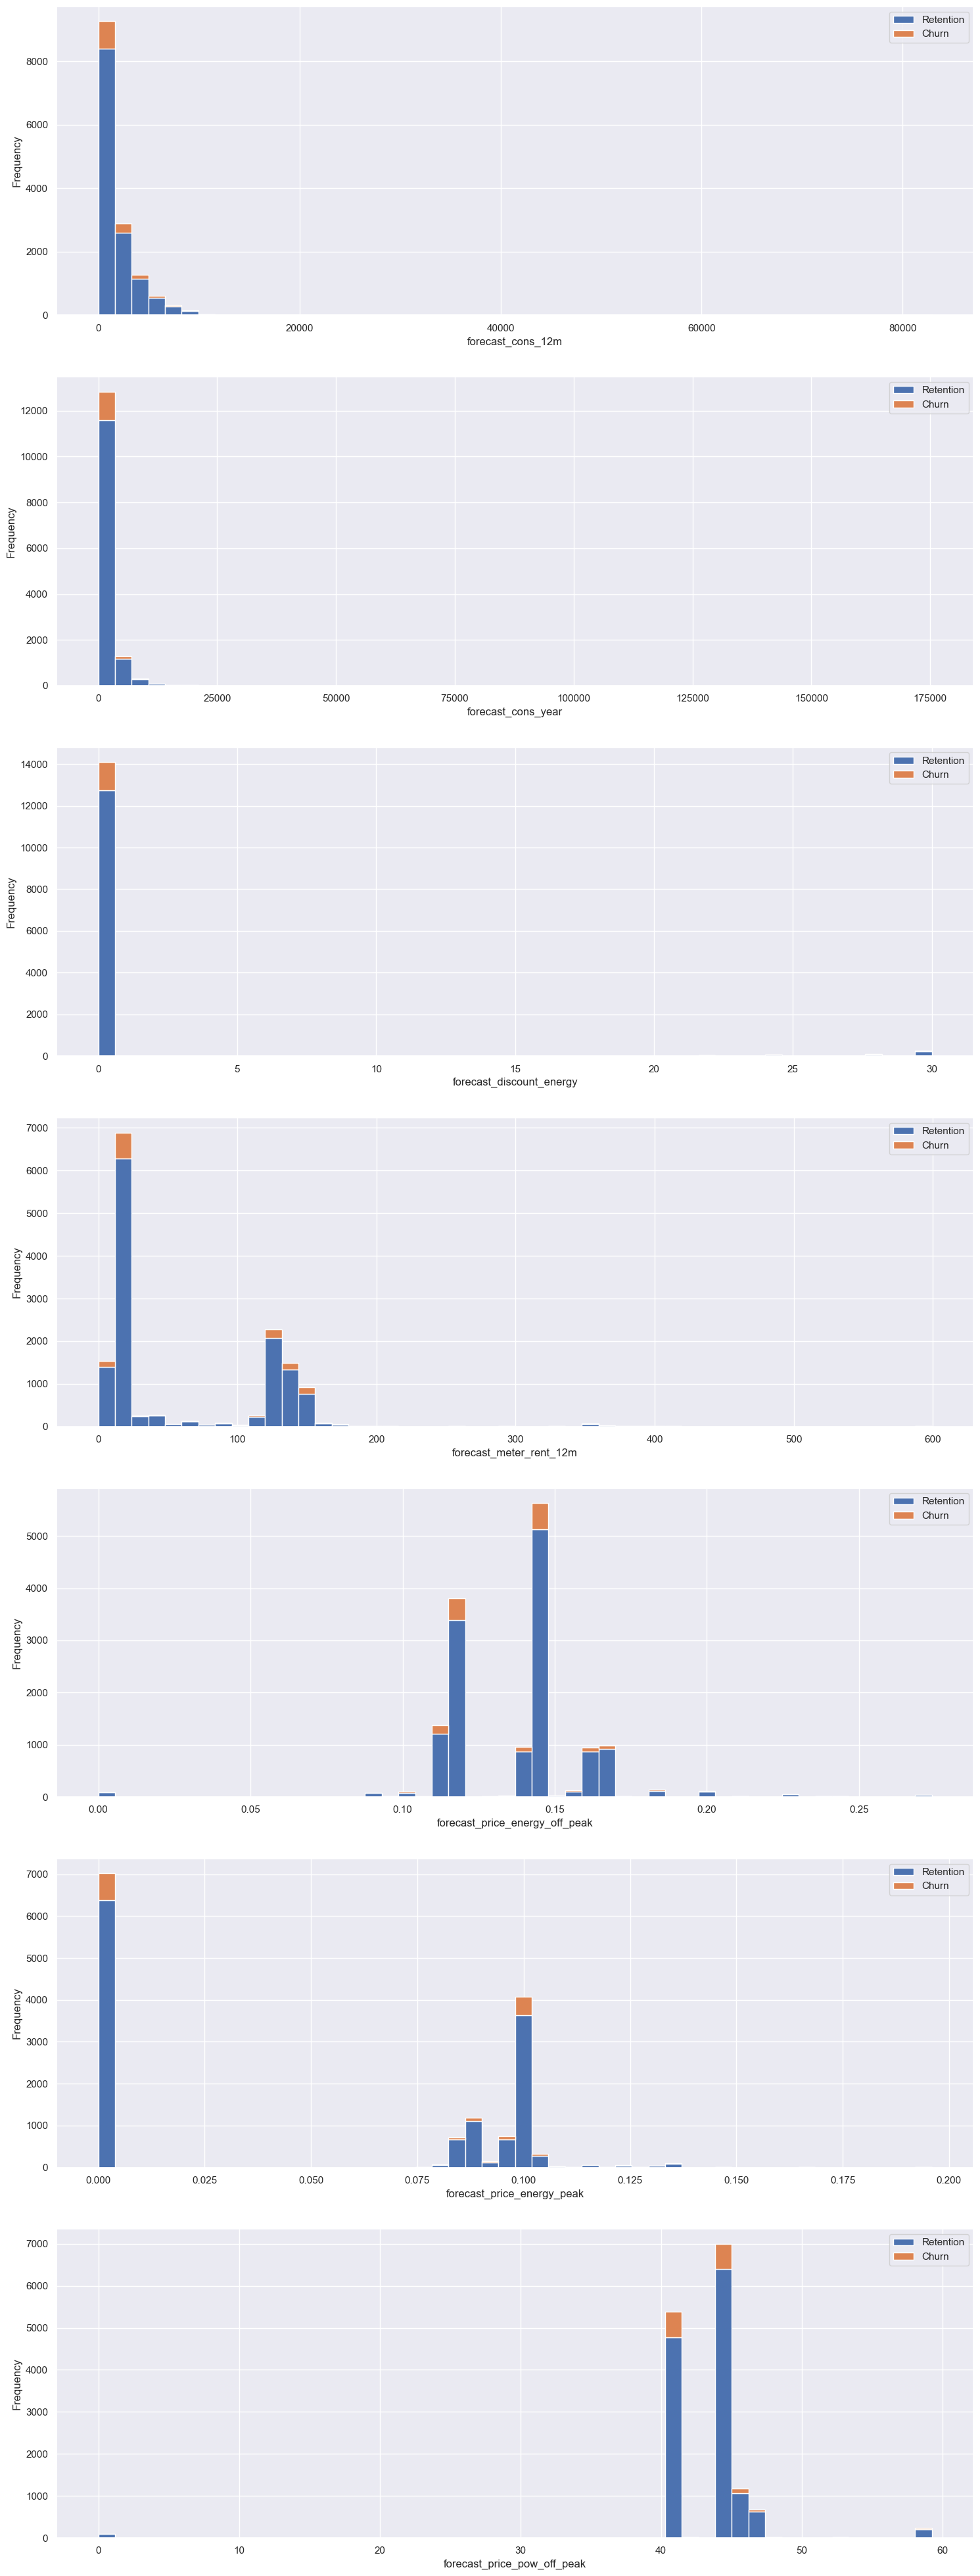

In [32]:
fig, axs = plt.subplots(nrows=7, figsize=(18, 50))

#Plot histogram
plot_distribution(client_df, 'forecast_cons_12m', axs[0])
plot_distribution(client_df, 'forecast_cons_year', axs[1])
plot_distribution(client_df, 'forecast_discount_energy', axs[2])
plot_distribution(client_df, 'forecast_meter_rent_12m', axs[3])
plot_distribution(client_df, 'forecast_price_energy_off_peak', axs[4])
plot_distribution(client_df, 'forecast_price_energy_peak', axs[5])
plot_distribution(client_df, 'forecast_price_pow_off_peak', axs[6])


**Contract type**

In [33]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
contract_percentage

churn,0,1
has_gas,,
f,89.945629,10.054371
t,91.814410,8.185590


Text(0.5, 1.0, 'Contract Type')

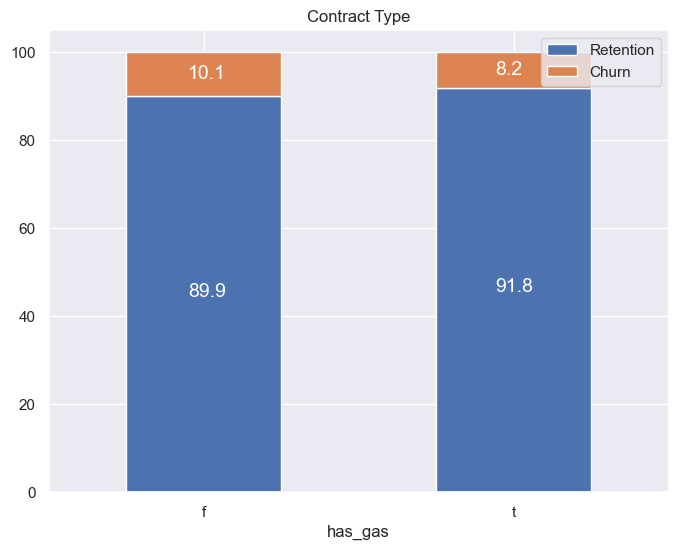

In [34]:
ax=contract_percentage.plot(kind='bar', stacked=True, figsize=(8,6), rot=0)
annotate_stacked_bars(ax, textsize=14)
plt.legend(['Retention', 'Churn'], loc='upper right')
plt.title('Contract Type')

The churn rate for customer without contract is a little bit higher than customers with contract.

**Margins**

In [35]:
margin = client_df[['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

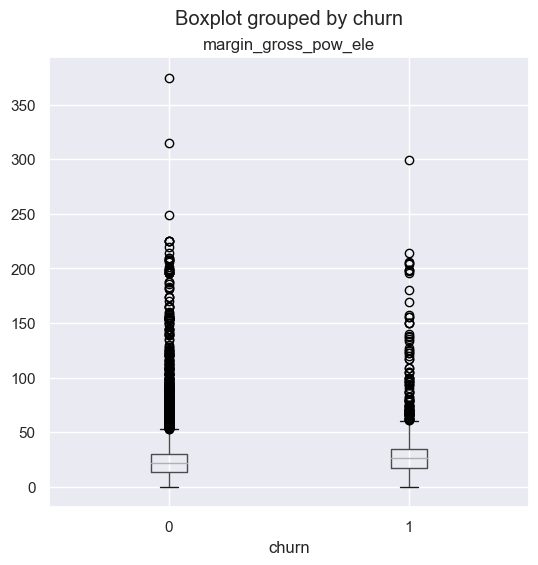

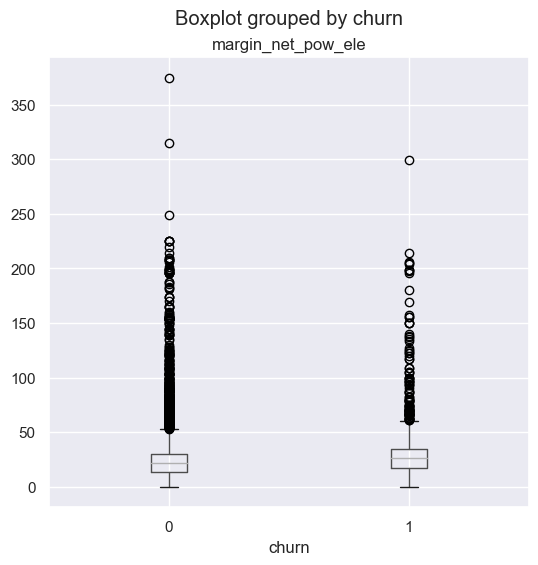

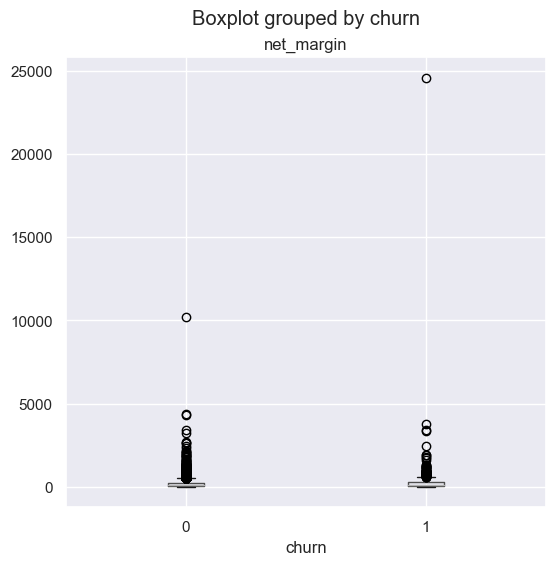

In [36]:
for col in margin:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

**Subscribed power**

In [37]:
power = client_df[['id', 'pow_max', 'churn']]

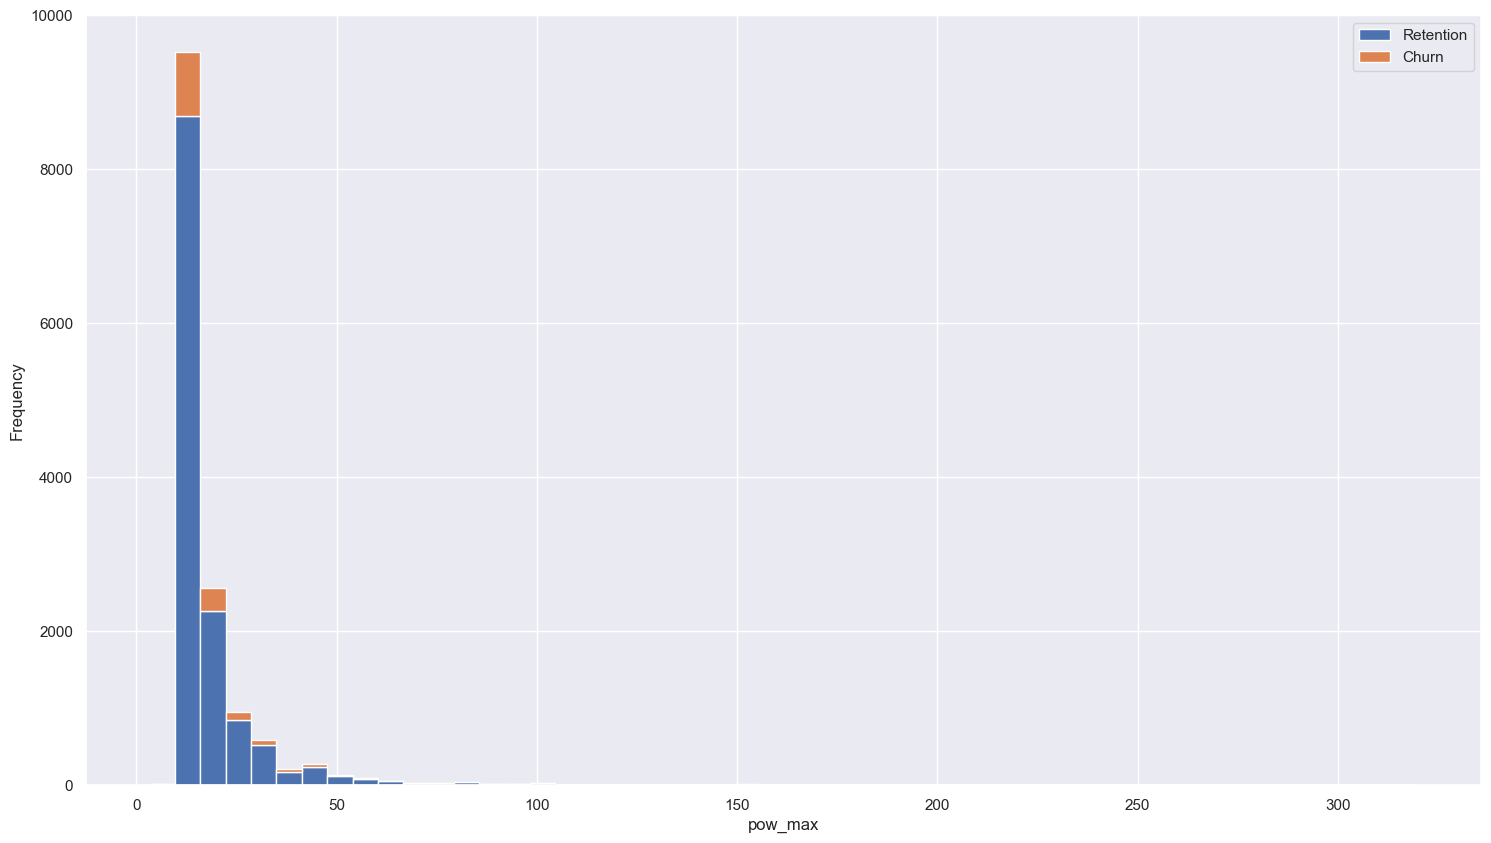

In [38]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

**Other columns**

In [39]:
other_cols = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = other_cols.groupby([other_cols['nb_prod_act'], other_cols['churn']])['id'].count().unstack(level=1)
products_percentage =(products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
products_percentage

churn,0,1
nb_prod_act,,
4,90.000000,10.000000
1,90.018371,9.981629
3,90.057361,9.942639
5,90.322581,9.677419
2,91.492843,8.507157
6,100.000000,NaN
8,100.000000,NaN
9,100.000000,NaN
10,100.000000,NaN


Text(0, 0.5, 'Company base(%)')

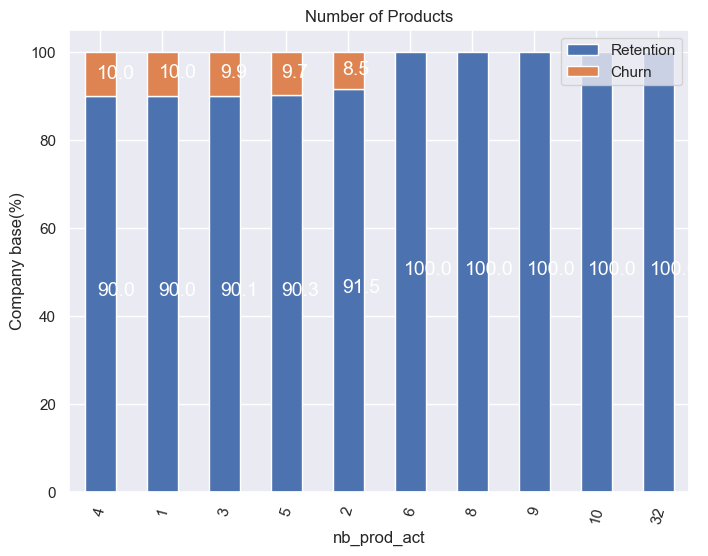

In [40]:
ax=products_percentage.plot(kind='bar', stacked=True, figsize=(8,6), rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Number of Products')
plt.legend(['Retention', 'Churn'], loc='upper right')
plt.ylabel('Company base(%)')

In [41]:
years_antig = other_cols.groupby([other_cols['num_years_antig'], other_cols['churn']])['id'].count().unstack(level=1)
years_antig_percentage =(years_antig.div(years_antig.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
years_antig_percentage

churn,0,1
num_years_antig,,
2,72.727273,27.272727
3,86.477600,13.522400
4,88.146660,11.853340
12,90.000000,10.000000
5,91.368148,8.631852
7,91.748527,8.251473
13,92.307692,7.692308
6,92.891592,7.108408
11,93.513514,6.486486


Text(0, 0.5, 'Company base(%)')

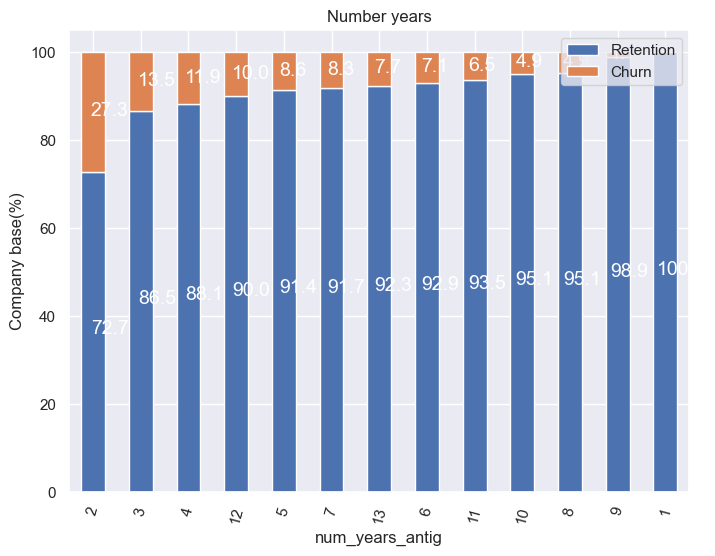

In [42]:
ax=years_antig_percentage.plot(kind='bar', stacked=True, figsize=(8,6), rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Number years')
plt.legend(['Retention', 'Churn'], loc='upper right')
plt.ylabel('Company base(%)')

In [43]:
origin = other_cols.groupby([other_cols['origin_up'], other_cols['churn']])['id'].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
origin_percentage

churn,0,1
origin_up,,
lxidpiddsbxsbosboudacockeimpuepw,87.417219,12.582781
ldkssxwpmemidmecebumciepifcamkci,91.613723,8.386277
MISSING,93.750000,6.250000
kamkkxfxxuwbdslkwifmmcsiusiuosws,93.991616,6.008384
ewxeelcelemmiwuafmddpobolfuxioce,100.000000,NaN
usapbepcfoloekilkwsdiboslwaxobdp,100.000000,NaN


Text(0, 0.5, 'Company base(%)')

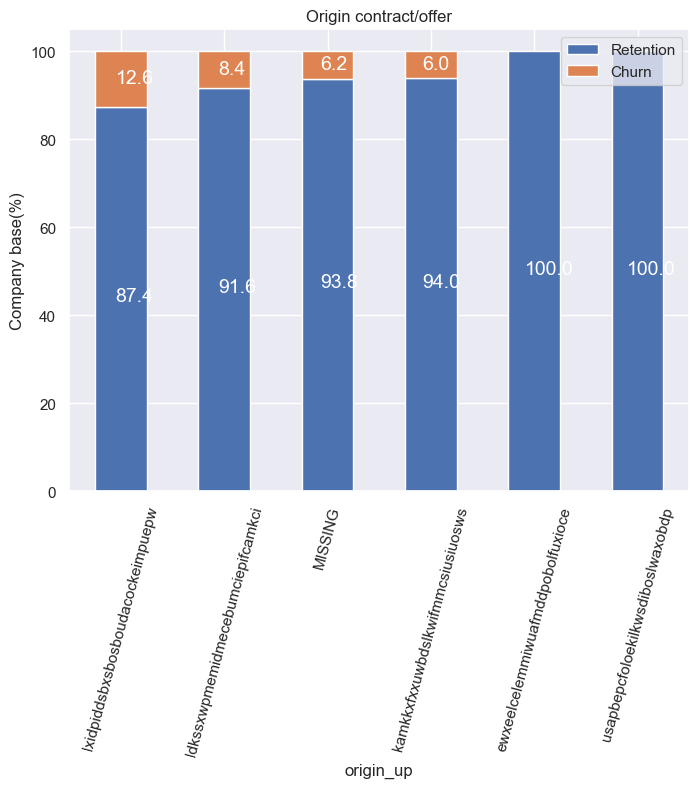

In [44]:
ax=origin_percentage.plot(kind='bar', stacked=True, figsize=(8,6), rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Origin contract/offer')
plt.legend(['Retention', 'Churn'], loc='upper right')
plt.ylabel('Company base(%)')

**Let's check Price Dataset**

In [45]:
price_df['id'].value_counts().value_counts()

count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64

Most customers have a 12-month price records each. Luckily, every customer has the last-month's record (2015-12-01), this will be helpful in identifying price sensitivity.

In [46]:
price_df['price_date'].value_counts()

price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

In [47]:
#plot histogram
def plot_histogram_by_churn(df, target_available, figsize=(20, 5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_available, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_available, bins=bins)

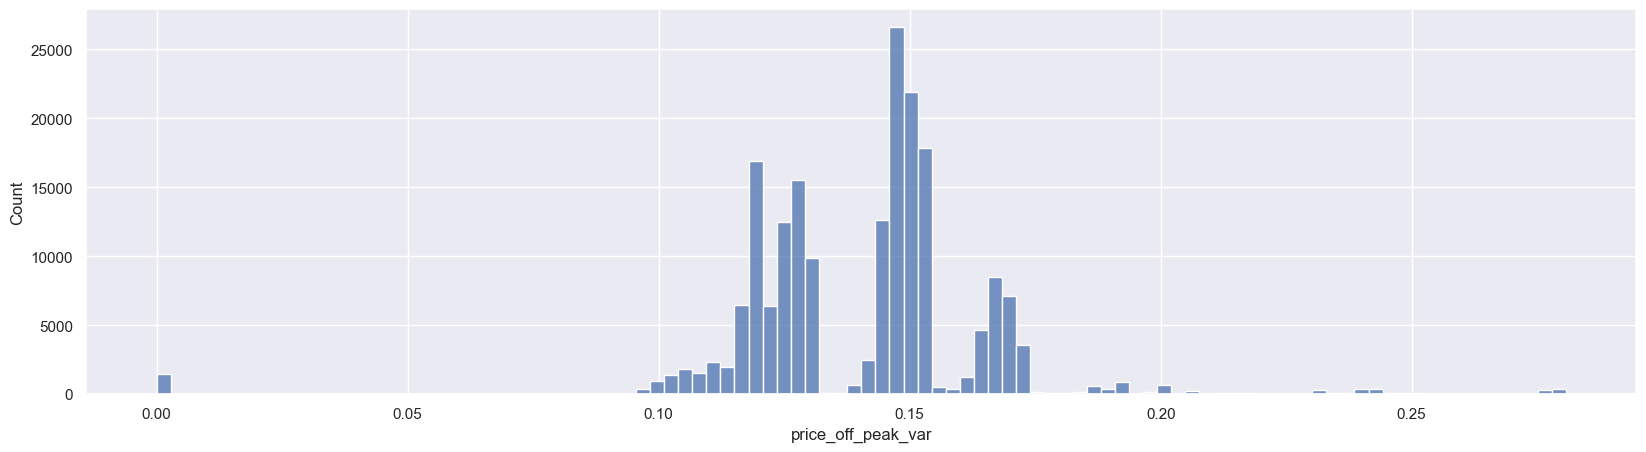

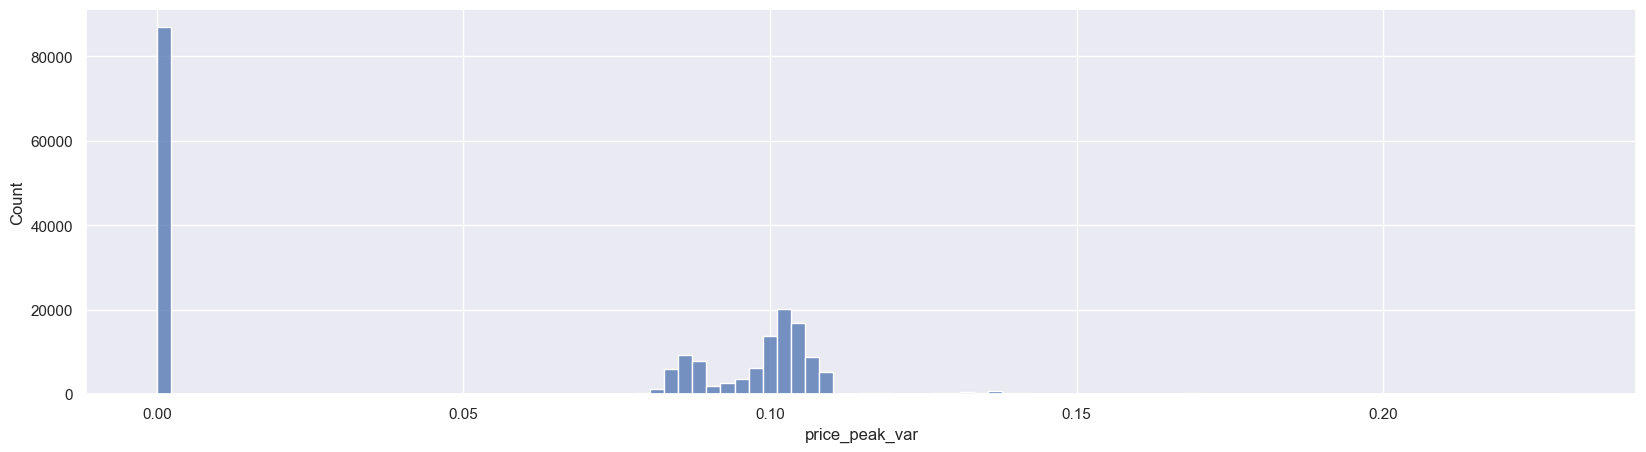

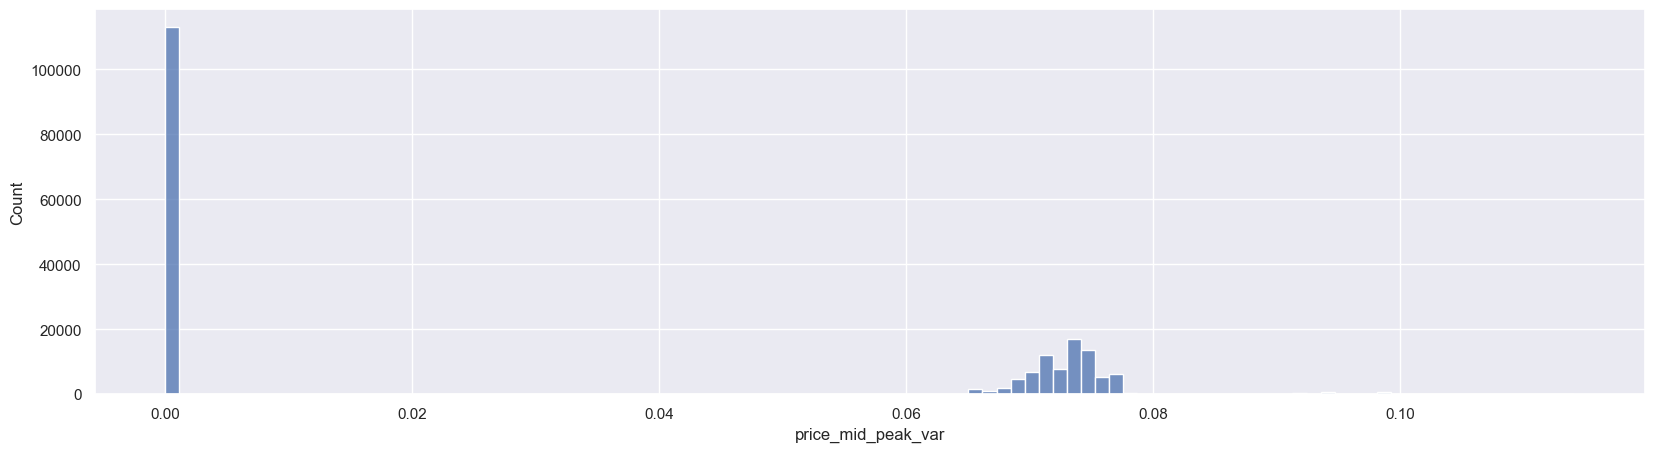

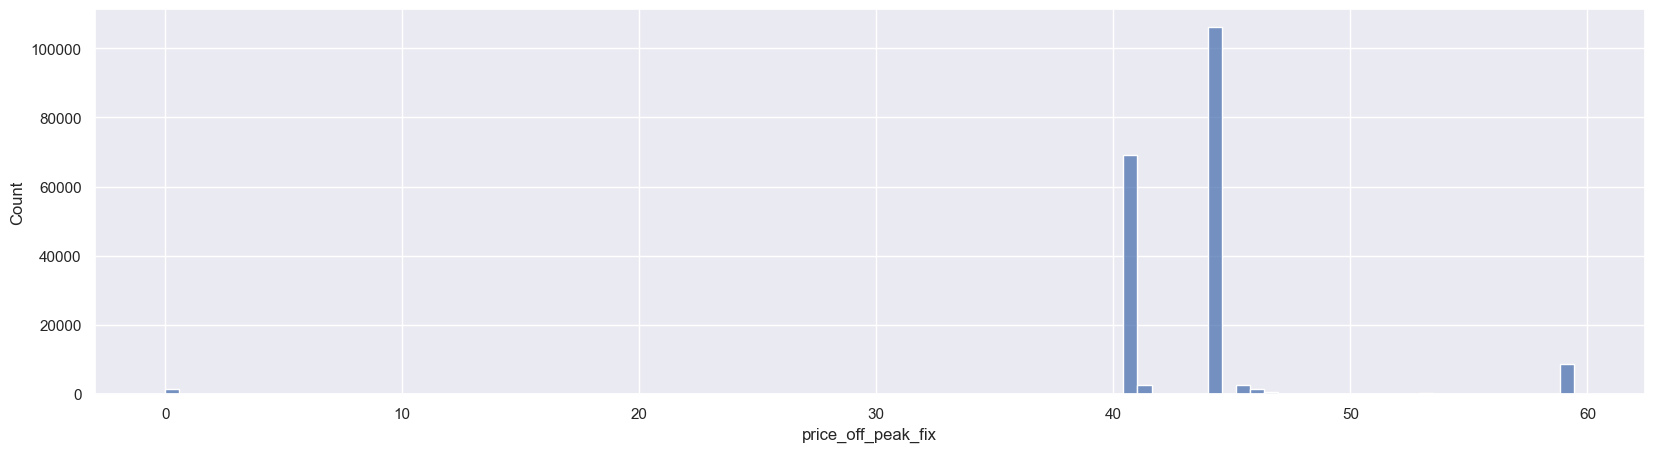

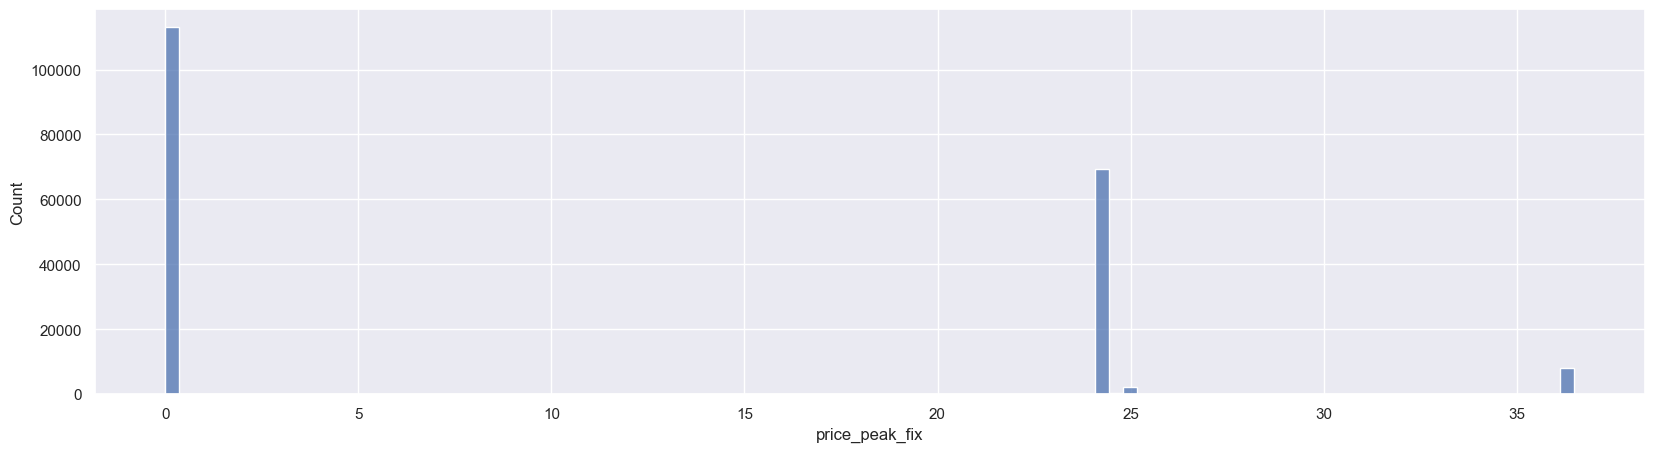

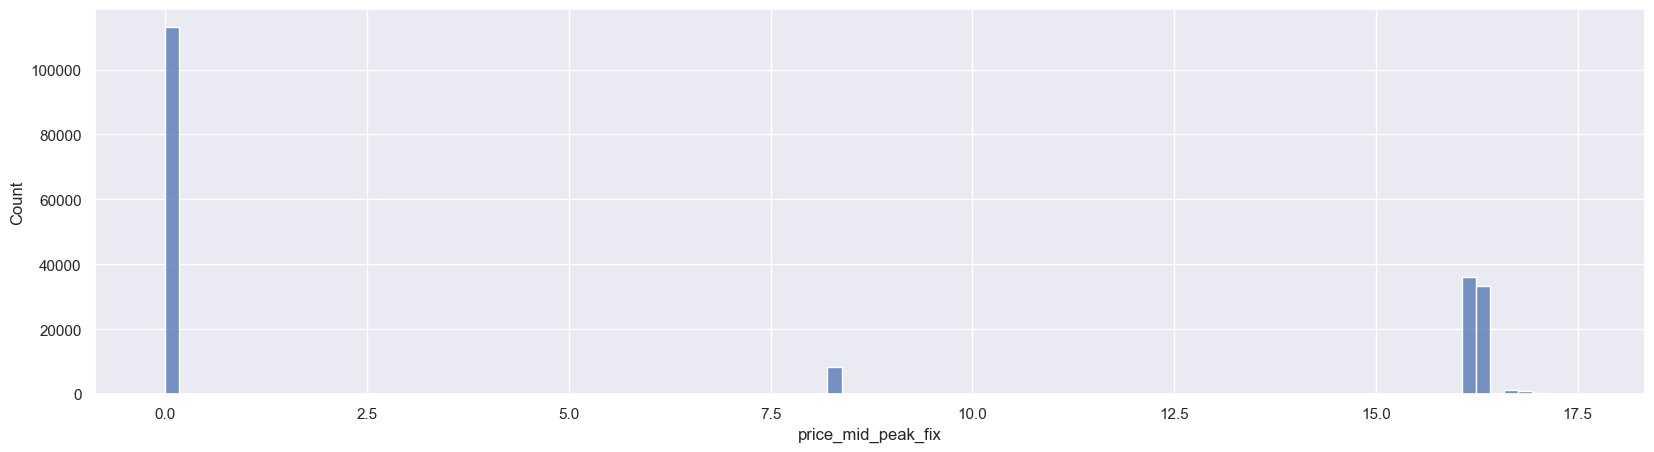

In [48]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_available=attr, if_churn=False)

Plot histograms of price features. The values of each feature are centred around some points.

There are lots of 0 peak prices and mid-peak prices, but very few 0 off peak prices. So, I will analyse price sensivity only based on off-peak prices

## Hypothesis Investigation

Now, let's check customers sensitivity to price. When the price increases and some cutomers leave, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. In case there is a decrease or no change in the price and cutomers still switch, it is hard to say these cutomers are sensitive to price.

Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure price sensitivity using the average of the year, the last 6 months and the last 3 months

In [49]:
#create mean average data
mean_year = price_df.groupby(price_df['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [50]:
mean_year.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [51]:
#rename the columns of mean_year
mean_year = mean_year.rename(

    columns={
        'price_off_peak_var': 'mean_year_price_off_peak_var',
        'price_peak_var' : 'mean_year_price_peak_var',
        'price_mid_peak_var' : 'mean_year_price_mid_peak_var',
        'price_off_peak_fix': 'mean_year_price_off_peak_fix',
        'price_peak_fix' : 'mean_year_price_peak_fix',
        'price_mid_peak_fix' : 'mean_year_price_mid_peak_fix'
    }
)

In [52]:
mean_year['mean_year_price_off_peak'] = mean_year['mean_year_price_off_peak_var'] + mean_year['mean_year_price_off_peak_fix']
mean_year['mean_year_price_peak'] = mean_year['mean_year_price_peak_var'] + mean_year['mean_year_price_peak_fix']
mean_year['mean_year_price_mid_peak'] = mean_year['mean_year_price_mid_peak_var'] + mean_year['mean_year_price_mid_peak_fix']

In [53]:
#rename the columns of mean 6 month
mean_6m = mean_6m.rename(

    columns={
        'price_off_peak_var': 'mean_6m_price_off_peak_var',
        'price_peak_var' : 'mean_6m_price_peak_var',
        'price_mid_peak_var' : 'mean_6m_price_mid_peak_var',
        'price_off_peak_fix': 'mean_6m_price_off_peak_fix',
        'price_peak_fix' : 'mean_6m_price_peak_fix',
        'price_mid_peak_fix' : 'mean_6m_price_mid_peak_fix'
    }
)

In [54]:
mean_6m['mean_6m_price_off_peak'] = mean_6m['mean_6m_price_off_peak_var'] + mean_6m['mean_6m_price_off_peak_fix']
mean_6m['mean_6m_price_peak'] = mean_6m['mean_6m_price_peak_var'] + mean_6m['mean_6m_price_peak_fix']
mean_6m['mean_6m_price_mid_peak'] = mean_6m['mean_6m_price_mid_peak_var'] + mean_6m['mean_6m_price_mid_peak_fix']

In [59]:
#rename the columns of mean 3 months
mean_3m = mean_3m.rename(

    columns={
        'price_off_peak_var': 'mean_3m_price_off_peak_var',
        'price_peak_var' : 'mean_3m_price_peak_var',
        'price_mid_peak_var' : 'mean_3m_price_mid_peak_var',
        'price_off_peak_fix': 'mean_3m_price_off_peak_fix',
        'price_peak_fix' : 'mean_3m_price_peak_fix',
        'price_mid_peak_fix' : 'mean_3m_price_mid_peak_fix'
    }
)

In [60]:
mean_3m['mean_3m_price_off_peak'] = mean_3m['mean_3m_price_off_peak_var'] + mean_3m['mean_3m_price_off_peak_fix']
mean_3m['mean_3m_price_peak'] = mean_3m['mean_3m_price_peak_var'] + mean_3m['mean_3m_price_peak_fix']
mean_3m['mean_3m_price_mid_peak'] = mean_3m['mean_3m_price_mid_peak_var'] + mean_3m['mean_3m_price_mid_peak_fix']

In [62]:
#merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [63]:
price_features.head()

,id,price_date_x,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,...,price_date,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,...,2015-11-16,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,...,2015-11-16,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,...,2015-11-16,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,...,2015-11-16,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,...,2015-11-16,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Let's merge the price feature dataset with churn variable to check whether price sensitivity has any correlation with churn.

In [64]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()

,id,price_date_x,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-06-16 12:00:00,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


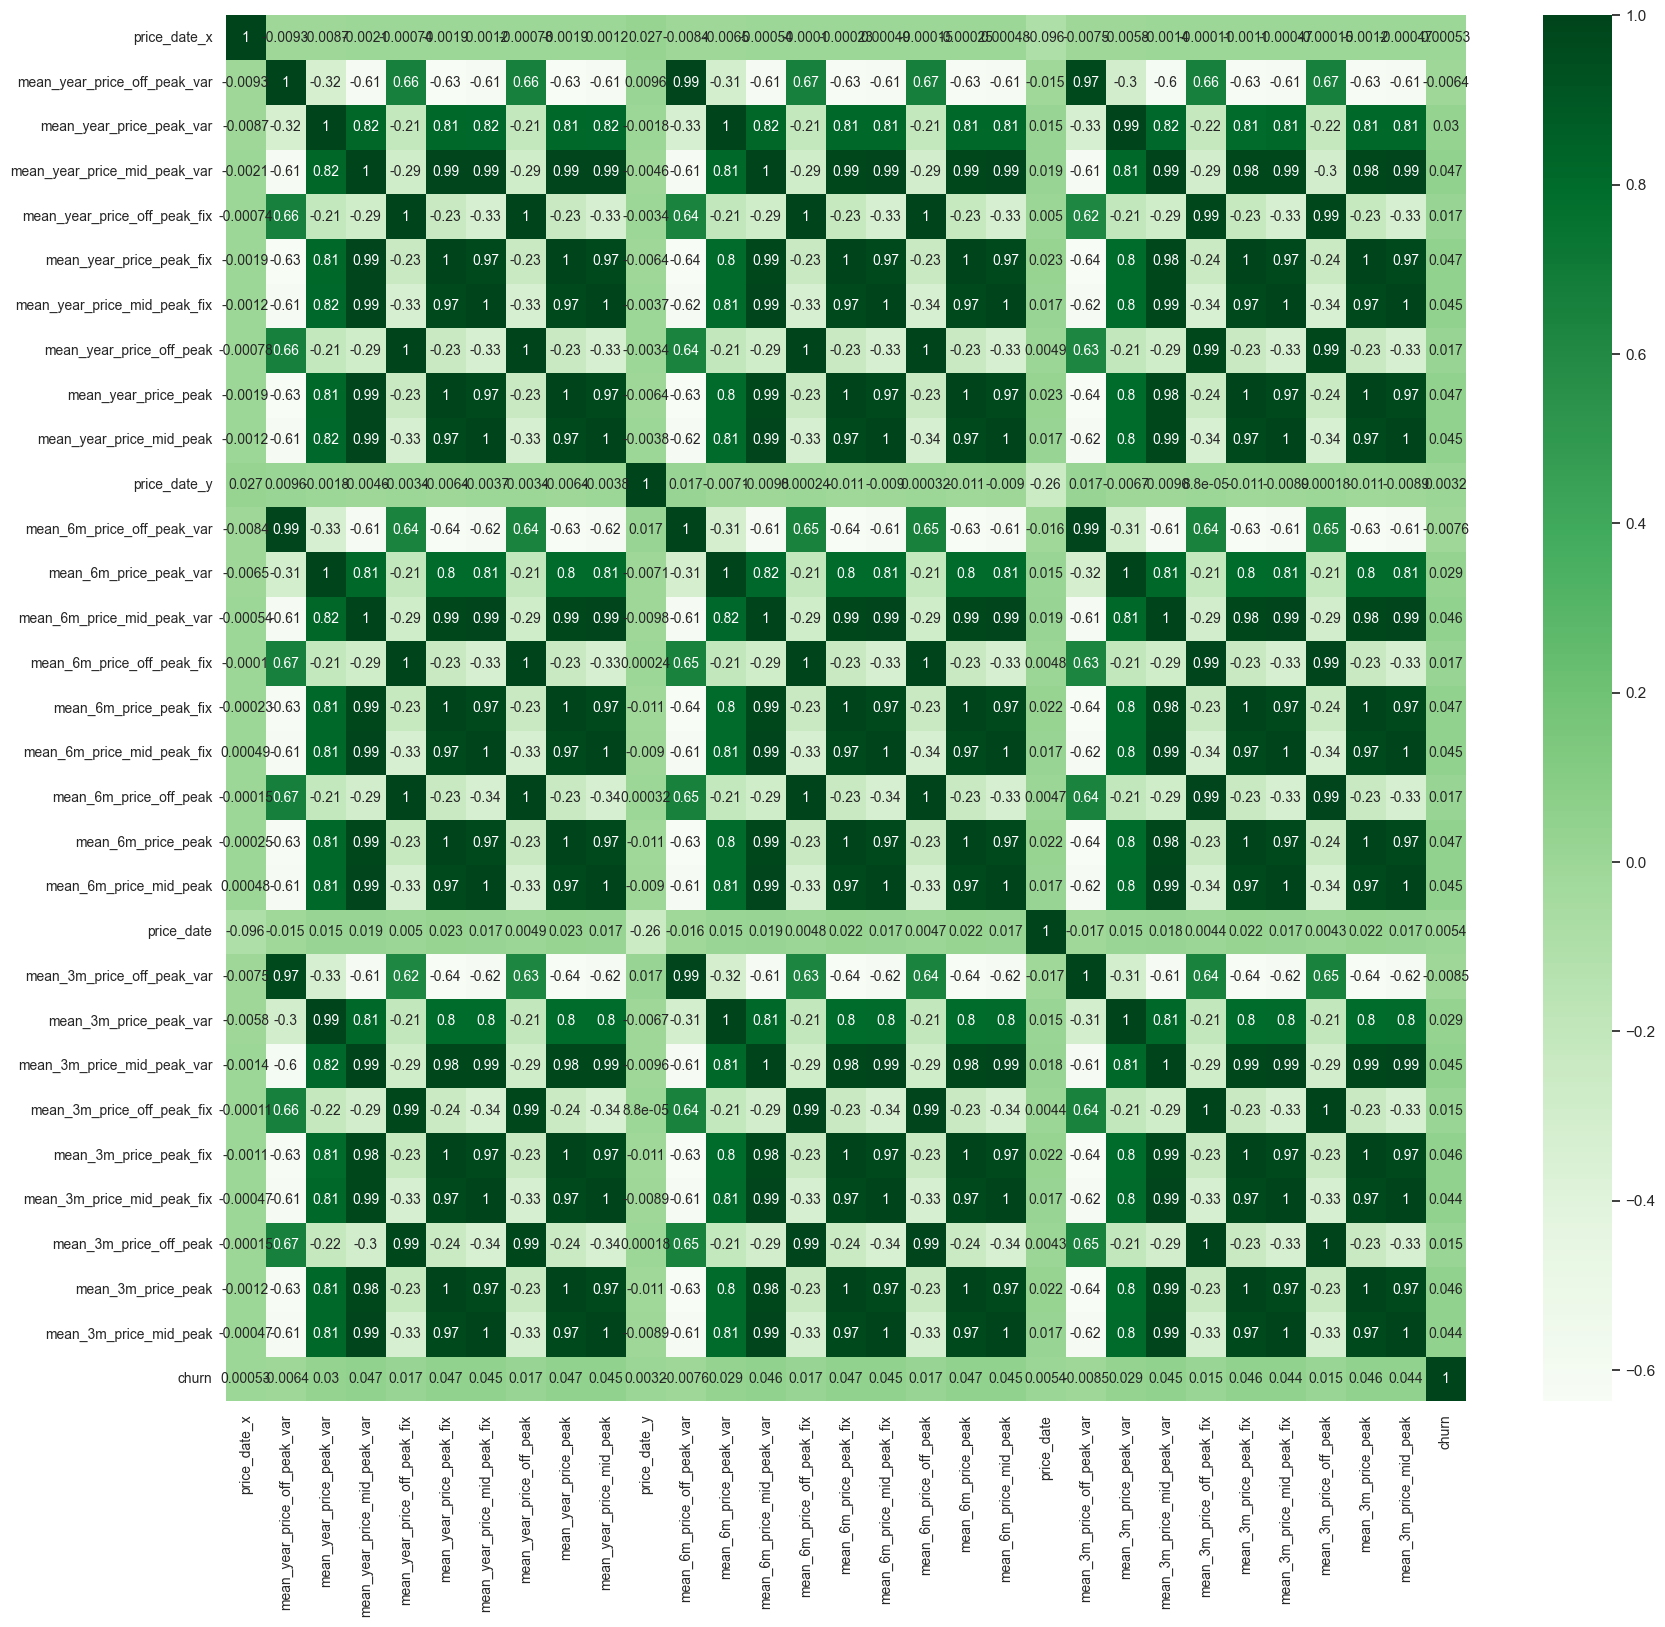

In [82]:
# Hapus kolom 'id', karena korelasi harus tipe data angka, bukan string
price_churn_no_id = price_churn.drop('id', axis=1)

# Hitung korelasi
corr = price_churn_no_id.corr()

# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Greens', annot=True, annot_kws={'size': 10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The above plot shows the correlation betweeen price variables with each other and with churn, however, the  correlation between churn and prices variables is very low, which mean customers' churn is not sensitive to price change. 

Now, we will merge the client data with price churn data for modeling in the next move. 

In [83]:
churn_data = pd.merge(client_df.drop(columns=['churn']), price_churn, on='id')

In [84]:
churn_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [85]:
churn_data.to_csv('clean_data_modeling.csv')